<img src="../../../thu_sigs_logo.png" alt="清华深研院-横" style="zoom:50%;" />

In [1]:
#| default_exp digital_processing_of_speech_signals.hidden_markov_model

In [1]:
#|hide
# autoreload
%load_ext autoreload
%autoreload 2
%load_ext rich

## 代码与文档格式说明

本文档使用Jupyter Notebook编写，所以同时包括了实验文档和实验代码。

本次实验项目采用了 Quarto + nbdev 的系统来发布Jupyter Notebook, 因而我们的实验文档导出为pdf和html格式可以进行阅读，而我们的代码也导出为python模块形式，可以作为代码库被其他项目使用。

我们这样做的好处是，避免单独管理一堆 .py 文件，防止代码冗余和同步混乱，py文件和pdf文件都是从.ipynb文件导出的，可以保证实验文档和代码的一致性。

### 文档阅读说明 {#sec:reading_notes}

::: {.callout-important}

本文档支持多个格式，包括ipynb, html, docx, pdf, md 等。您在阅读本文档时，可以选择您喜欢的格式来进行阅读。

但是由于本文档具有一定的交互性，我们优先建议您打开我们构建的[在线文档网站](https://thu-coursework-machine-learning-for-big-data-docs.vercel.app/) 或者 [github pages](https://open-book-studio.github.io/THU-Coursework-Machine-Learning-for-Big-Data/)进行阅读，或者使用浏览器打开作业提交的文件夹中`html`格式的文档本地打开进行阅读。

其次是建议您使用 Visual Studio Code (或者其他支持jupyter notebook的IDE, 但是VSCode阅读体验最佳) 打开 `ipynb`格式的文档来进行阅读。

VSCode或者浏览器阅读的ipynb和html文档都可以显示交互性图表、数据，这样比pdf文件阅读体验更佳。

:::

### 代码使用说明

https://github.com/Open-Book-Studio/THU-Coursework-Machine-Learning-for-Big-Data.git 是我们本次大数据机器学习课程实验的代码仓库地址。

我们的实验代码都是通过 jupyter notebook 进行编写，并通过 nbdev 进行自动化构建pypi库。
复现我们实验代码时，建议使用支持jupyter notebook的IDE（如VSCode）运行我们的 `ipynb文件`。

::: {.callout-note}
可以通过以下命令安装我们实验的代码：

```shell
git clone https://github.com/Open-Book-Studio/THU-Coursework-Machine-Learning-for-Big-Data.git
cd THU-Coursework-Machine-Learning-for-Big-Data
pip install -e .
```
我们的代码导出为了python模块形式，如果你需要在别的项目中调用我们的代码，可以通过以下命令导入：
```python
from thu_big_data_ml.digital_processing_of_speech_signals.hidden_markov_model import *
```
:::

这次作业中，我开发的我们课题组的基础依赖库[ScholarlyInfrastructure]\(https://github.com/THU-CVML/ScholarlyInfrastructure)也相应地进行了代码更新。这个库对标`fastcore`库，对AI科研经常会用到的一些基础性地、和Python语言的表达力有关的代码进行了整理，比如PyTorch模型检查、清晰的日志、实验参数管理、异常处理、argmax自动函数优化等。接下来我们也会用到这个项目中的一些代码来完成本次作业。

::: {.callout-tip}

通过以下命令安装 ScholarlyInfrastructure

```shell
git clone https://github.com/THU-CVML/ScholarlyInfrastructure.git
cd ScholarlyInfrastructure
pip install -e .
```

```python
from scholarly_infrastructure import *
```

以上的代码库都已经开源在github和pypi，欢迎各位同学、老师们提出宝贵意见，或者加入我们的开发一起完善，构建更加优质的科研工具。
:::



In [2]:
from scholarly_infrastructure.logging.nucleus import logger, print
from thu_big_data_ml.help import plt, pio
import treescope
treescope.active_autovisualizer.set_globally(treescope.ArrayAutovisualizer())

In [3]:
#| hide 
import nbdev; nbdev.nbdev_export()

## 基本任务：查找阅读文献资料并回答问题

### 查找并阅读至少 3 篇有关 HMM 模型的参考文献资料

> 其中：至少 1 篇为经过同行评审的正式发表的英文论文（会议或期刊均可）；不得多于 1 篇为知乎、博客、百科等非正式发表的科普性阅读资料或讲义。（10 分）

根据老师给我们的要求，我们需要找到至少 3 篇有关 HMM 模型的参考文献资料。
我们查找资料的目的是为了学习理解 HMM 模型的基本原理和应用，深入地回答老师问我们的几个问题以及我们自己的问题。

最终我选择的文献包括

- 李航的《机器学习方法》 [@LiHang_2022]
    - 这个是正式出版发表的中文书籍(教材课本)，经过了出版社编辑的评审，但是不一定是经过了论文的同行评审。
    - 这个书是机器学习领域的经典教材，数学推导较为详细，叙述较为清晰，适合深入学习。

- 老师作业文档里面建议我们阅读的 Tutorial [@Rabiner_1989]
    - 这是经过同行评审的英语论文。发表在 Proceedings of the IEEE 上。
    - 唯一作者 LAWRENCE R. RABINER 是IEEE Fellow， H-index 39。
    
- 自然语言处理方向使用到HMM的最新前沿论文，具体方向不限，我选择了 "Adaptable Logical Control for Large Language Models" [@Zhang_2024]

    - 这是一篇经过同行评审的英文论文。发表在 AI三大顶会之一的 NeurIPS 上，是2024年最新的文章。
    - 第一作者是 Zhang Honghua，五个作者都来自于UCLA。
    - 论文核心贡献在于使用HMM来实现大模型的可控输出，我觉得这是个很有意思的研究问题。

除了这三篇论文，我还可能在回答问题过程中引用一些其他资料或者论文。


::: {.callout-note}
关于“Proceedings of the IEEE”的一些问题。我们通过搜索引擎和AI查询，回答我们的一些问题。

- “Proceedings”是什么意思？和Transaction、Conference等词语的关系是什么？
    - "Proceedings（会议录/会议论文集）" 是指特定学术会议结束后出版的论文集合，通常包含会议中发表的论文、演讲、讨论和报告，这些论文可能未经同行评审。
        - 追问：那 Proceedings of the IEEE 是不是经过了同行评审？
        - 追问：这个英语单词明明原意是“进度”“进展”，或者“诉讼程序”，为什么在IEEE里面引申成了“会议集”，听起来好奇怪啊？
        - 追问：那么 Proceedings 到底是 会议还是期刊呢？
    - "Transactions（学报）" 是指一系列定期出版的学术期刊，它们通常包含经过严格同行评审的论文，强调期刊的连续性和系统性，常见于工程和技术领域。
        - 追问：这个英语单词原本的意思是交易，或者我们学数据库课的时候，数据库里面的“事务”，为什么也有学报的意思，英语上是怎么引申而来的？
        - 追问：经常听别的专业的人说有“清华大学学报”这种高校的学报可以发论文，但是我们计算机科学和人工智能领域我好像没见过啊，是不是对于我们这个领域来说这些学报是很水的？
    - "Conference（会议）" 是指学术会议本身，是学者们聚集在一起交流研究成果、讨论学术问题的活动，可以是国际的、国内的，或特定领域的专业会议。
        - 追问：其他学科的人为什么会认为“会议很水，比期刊弱多了”，而我们CS学科却认为“会议”才是最重要的？
    - "Workshop（研讨会/工作坊）" 是指规模较小、更加非正式的学术会议，通常专注于某个特定的研究领域或问题，强调互动和讨论，可能包括讲座、小组讨论和实践环节。
        - 追问：为什么很多师兄师姐会提到，“Workshop很水，千万别发，也不要看”？从字面意义来看似乎没有说Workshop很垃圾啊？如果我发一篇Workshop是不是毕不了业？

    - "Journal（期刊）" 是指定期出版的学术出版物，包含经过同行评审的学术论文，可以是综合性的，也可以是特定学科或领域的专业性期刊。

- “Proceedings of the IEEE”影响力如何？是不是 CCF 和 TH-CPL A类期刊会议？如果我发一篇这个，能否毕业？
    - 根据我的查询，我们发现，[CCF](https://ccf.atom.im/)和[清华分级TH-CPL](https://numbda.cs.tsinghua.edu.cn/~yuwj/TH-CPL.pdf)都一致认为，这是重要的“综合与交叉（Interdisciplinary）”A类期刊！
    - 这个结果让我震惊，因为要想发这里面的文章，似乎我只需要写Tutorial，不需要提出自己的方法达到SOTA！这是另一个赛道！
    - 而且Tutorial的影响力很大，这个期刊的年平均引用量高达46.4。

- 老师提到的语音领域相关会议、期刊有TASLP，ICASSP，INTERSPEECH。这些期刊会议是几类CCF和TH-CPL呢？如果我发这些能毕业吗？
    - 根据搜索结果，这三个分别是 CCF-B期刊, CCF-B和CCF-C会议。
    - 但是对于[清华分级TH-CPL]\\(https://numbda.cs.tsinghua.edu.cn/~yuwj/TH-CPL.pdf)来说，TASLP升级为A类，ICASSP仍为B类，INTERSPEECH未上榜。
:::



### 以标准参考文献的格式列出所阅读的参考文献列表，并在回答以下问题时给出明确的引用。（5 分）

根据老师提供的 ICASSP 论文的要求：

> - REFERENCES: List and number all bibliographical references at the end of the paper. The 
> references can be numbered in alphabetic order or in order of appearance in the 
> document. When referring to them in the text, type the corresponding reference 
> number in square brackets as shown at the end of this sentence [2].
> 
> - The end of the document should include a list of references containing information similar 
> to the following examples (Pay attention to all format details, including but not limited to 
> authors’ name list, lower/upper-cases, punctuations, etc.):
>
>   - [1] D. E. Ingalls, "Image Processing for Experts," IEEE Transactions on Acoustics, Speech, and Signal Processing (TASSP), vol. TASSP-36, pp. 1932-1948, 1988.



论文的引用(citation)包括 in text citation  和 bibliography 。根据上面的要求，in text citation 应该是"[1]" 而非"(author, date)"的格式。而bibliography排序是按照字母顺序或者文档中出现的先后顺序。从示例来看，这很可能是 IEEE 格式，而且ICASSP是IEEE旗下的会议。

IEEE引用格式可以被`CSL` (Citation Style Language)语言形式化定义，参考文件[ieee.csl](https://github.com/citation-style-language/styles/blob/master/ieee.csl)。`CSL`语言广泛地被使用在 zotero, latex, typst 等软件系统中。

而参考文献本身一般使用 `BibLaTeX` 格式来进行记录，这一格式也已经被广泛使用。需要注意的是，`BibLaTeX` 不是 `BibTeX`格式，两者有区别，参考https://pandoc.org/MANUAL.html#citations。

本文档使用 quarto 科学文档系统进行撰写，采用的是 Pandoc Markdown 格式来在jupyter notebook中引入参考文献，参考 https://quarto.org/docs/authoring/citations.html 。quarto也支持CSL和BibLaTeX。需要注意的是，latex中`\cite`与`\ref`不同，前者是引用文献，后者是引用图表、公式、章节等。但是在 pandoc 引用格式中，这两者都是使用`@key`的方式来 in text citation，而被交叉引用的目标使用 `{#key}`  来标注。

我们在 `ipynb` 中的第一个raw block中指定了对应的 `CSL` 样式文件 `ieee.csl`，并在 `BibLaTeX` 格式的参考文献文件 `references.bib` 中，然后在正文中使用`[@citation_key1, @citation_key2]`的格式来进行In Text Citation。



如 ICASSP 的要求，我们把所有的参考文献列表放在了文末 @sec-ref-list。

::: {.callout-warning}
如果您是通过jupyter notebook而非通过文档网站阅读我们的文档 (见@sec:reading_notes的说明)，您可能无法看到自动生成的参考文献，所以我们也把刚才我们找的三篇文献以文本形式在此列出。
<!-- TODO -->
[1] 李航, 机器学习方法. <a href="https://book.douban.com/press/2562">清华大学出版社</a>    <br>                                                      <span class="pl">出版年:</span> 2022-3, 2022. Accessed: Dec. 07, 2024. [Online]. Available: https://book.douban.com/subject/35884788/

[2] L. R. Rabiner, “A tutorial on hidden Markov models and selected applications in speech recognition,” Proceedings of the IEEE, vol. 77, no. 2, pp. 257–286, Feb. 1989, doi: 10.1109/5.18626.

[3] H. Zhang, P.-N. Kung, M. Yoshida, G. V. den Broeck, and N. Peng, “Adaptable Logical Control for Large Language Models,” presented at the The Thirty-eighth Annual Conference on Neural Information Processing Systems, Nov. 2024. Accessed: Dec. 08, 2024. [Online]. Available: https://openreview.net/forum?id=58X9v92zRd&referrer=%5Bthe%20profile%20of%20Honghua%20Zhang%5D(%2Fprofile%3Fid%3D~Honghua_Zhang1)

:::


### 什么是马尔可夫过程？一阶马尔可夫过程的特点是什么？（可结合图）对一阶马尔可夫过程及一阶马尔可夫系统进行明确的形式化定义。（3 分）

#### 什么是马尔可夫过程? {#sec:markov_process}

从词语本身的定义来看，马儿可夫过程(Markov Process)是指具备了马尔科夫性质的随机过程 [@LiHang_2022]。所以要理解什么是马尔可夫过程，无非就是要理解清楚这两个子概念：马尔可夫性质和随机过程。

1. 首先什么是随机过程呢？这个我在之前的课上确实没有学过，所以我们这里认真的把这个概念梳理一下。

李航在第 19 章准备对马尔科夫链进行定义的时候，先对随机过程进行了一个较为严谨的定义 [@LiHang_2022]：

> 考虑一个随机变量的序列$X=\left \{X_0,X_1,...,X_t,...\right\}$，这里$X_t$表示时刻t的随机变量，t=0,1,2,...。每个随机变量$X_t$(t=0,1,2,...)的取值集合相同，称为状态空间，表示为S。随机变量可以是离散的，也可以是连续的。以上随机变量的序列构成**随机过程（stochastic process）**。

可以看到李航的定义的关键点在于两个，首先随机过程是随机向量(序列)构成的，其次就是这个向量里面的每一个随机变量共享一个一样的状态空间S。

李航这样定义的意思其实就是想要建模一个随时间变化分布会变化的随机变量，可能取值范围倒是不会变，毕竟还是同一个东西，像是股票的价格，天气的状态，但毕竟分布变化了，所以就不是同一个随机变量了，而是得做一列随机变量序列，叫做随机过程。

随机过程的英文也可以是 Random Process, t=0,1,2,...叫做索引集合(index set)，虽然一般index set都是时间，但是没有限制 [@Stochastic_process_2024]。相邻时间点的两个随机变量的差$X_{t+1}-X_t$ 也称为增量(increment) [@Stochastic_process_2024]。李航的定义只考虑序列，但是index set不一定是有限或者可数无穷的集合，也可以是连续的实数，后者叫做continuous-time stochastic processes，而前者叫做discrete-time stochastic processes; 如果进一步index set不仅离散而且就是整数集合或者子集，那么这个随机过程还可以叫做随机序列(random sequence) [@Stochastic_process_2024]。

刚才说的是时间是否离散，如李航定义所说，状态空间也有连续离散的问题 [@LiHang_2022]。如果状态空间离散，就叫做离散或者整值随机过程(discrete or integer-valued stochastic process)，如果状态空间连续，就叫做实值随机过程(real-valued stochastic process) [@Stochastic_process_2024]。



2. 那么什么是马尔可夫性质呢？

根据李航的定义 [@LiHang_2022]，

> 假设在时刻0的随机变量$X_0$遵循概率分布$P(X_0)=\pi_0$，称为初始状态分布。在某个时刻$t \geq 1$的随机变量$X_t$与前一个时刻的随机变量$X_{t-1}$之间有条件分布$P(X_t|X_{t-1})$；如果$X_t$只依赖于$X_{t-1}$，而不依赖于过去的随机变量$\{X_0, X_1, \cdots, X_{t-2}\}$，这一性质称为马尔可夫性，即  
>
>$$
>P(X_t|X_0, X_1, \cdots, X_{t-1}) = P(X_t|X_{t-1}), \quad t=1,2,\cdots
>$$ {#eq:markov}
>

@eq:markov 用概率语言严谨定义了马尔可夫性 (Markov property)，马尔可夫性是描述一个随机过程的，如果我事先知道或者先验地假设一个随机过程里面的概率就是有这个性质，那就是在说如果我都知道了$X_{t-1}$的具体值了，你再告诉我之前滞后的信息我认为根本没用，随机过程的内在规律都会去得到相同的 $X_t$ 分布（当然，不一定是相同值）。

马尔可夫性也被成为无记忆性 (memorylessness) [@Markov_chain_2024]。

注意马尔可夫性并不是平稳性 (stationarity) , 平稳性也是随机过程的一个性质，对于时间序列预测来说很重要 [@Stationary_process_2024], 有一定的关系但是不一样。

动态规划（Dynamic programming）中，中文社区经常提到“无后效性”，但是这个并没有对应的英文术语（我未能搜索到 no-aftereffect property），无后效性是指要求解一个第t个子问题的时候，只需要关注t之前的事情，不需要关注t之后的事情 [@无后效性]。这个性质比马尔科夫性要求要弱一些，当前问题只需要不和未来问题有关就行了，没有要求只和过去最近的1个问题有关。

英语社区中，一般会讲“最优子结构 (optimal substructure)”。这个术语是用来描述一个问题是否可以分解为子问题。这是一个比“无后效性”还要宽泛的概念，只需要问题能够分解为子问题，没有说子问题是不是重叠的，动态规划和分而治之都是解决有最优子结构的问题的算法 [@Optimal_substructure_2024]。

以上两个术语描述的是问题的求解，而我们马尔科夫性描述的对象是随机过程。当然这是很相关的，待会我们要解决隐形马尔科夫模型的一些问题的时候，就会用到动态规划。

3. 什么是马尔可夫过程？

我们继续一起阅读李航的定义 [@LiHang_2022]，

>具有马尔可夫性的随机序列$X = \{X_0, X_1, \cdots, X_t, \cdots\}$称为马尔可夫链(Markov chain)或马尔可夫过程(Markov process)。条件概率分布$P(X_t|X_{t-1})$称为马尔可夫链的转移概率分布。转移概率分布决定了马尔可夫链的特性。

原来，马尔科夫链就是马尔科夫过程。后者强调这个是一个随机过程，前者强调说马尔可夫性让这个随机过程变得像是一个链表( linked list, link是指那个指针，chain是指合在一起的东西, 像是区块链 block chain)。

也有资料指出，马尔科夫链一般是指时间离散的马尔科夫过程，最好不要用来描述连续时间的随机过程 [@馬可夫過程_2022]。



#### 什么是一阶马尔可夫过程及一阶马尔可夫系统？

刚才李航定义的马尔科夫过程其实已经是一阶马尔可夫过程了，和 [@Rabiner_1989]的定义是一样的，简单来说n阶就是和过去n个时刻的随机变量有关，而一阶就是只和过去一个时刻的随机变量有关。

李航的定义了马尔科夫过程，定义是没有问题的。M阶马儿可夫过程是额外的一个概念进行了扩充定义，也叫做具有记忆的马尔科夫链 [@Markov_chain_2024]，形式化的来说，对于一个有限的M，M阶马尔可夫过程就是满足M阶马尔可夫性质的随机过程，即

>$$
>P(X_t|X_0, X_1, \cdots, X_{t-1}) = P(X_t|X_{t-1}, X_{t-2}, \cdots, X_{t-M}), \quad t=1,2,\cdots
>$$ {#eq:markov_m}


而系统(system)和过程岁有区别，但是基本是同义词。在 Rabiner的论文 [@Rabiner_1989] 中，system拥有状态，也就是刚才说的X，系统的状态会变化。这个系统在论文中可以是 signal processing system, recognition systems等。过程可能更多是指这个系统状态变化的的过程，Rabiner并未严格区分术语 [@Rabiner_1989]。
而在刚才李航的定义中，我们可以看到，过程是由随机变量序列构成的，状态空间一样 [@LiHang_2022]，也就是说系统拥有的是状态，而过程拥有的是序列。



而在信号与系统 (Signals and Systems) 中，也有一个系统(system)，这里面是怎么定义的呢？我确实之前没有学过这个课程，于是我为了完成本次作业，学习了一下 MIT 信号与系统的公开课程 第一节，课件为 https://ocw.mit.edu/courses/6-003-signals-and-systems-fall-2011/012675925c0f652bb179b6a33cd3d13b_MIT6_003F11_lec01.pdf 。

首先，信号（signal）类似于随机过程，但是信号是一个确定性的函数，自变量是时间，因变量是电压、速度等物理量。
而一个系统 (system) 是对信号做的变换(transform)，把输入信号转换为输出信号，所以它是一个算子 (operation)，把函数变成另一个函数。

根据我的理解，对于马尔科夫链来说，如果我们说 $X_t$的密度函数 $P(X_t)$是个“输入信号”（自变量不是时间，而是状态取值），那或许我们就可以说 $P(X_t|X_{t-1})$ 可以通过概率公式 $P(X_t) = \sum_{x_{t-1}} P(X_t|X_{t-1}=x_{t-1}) P(X_{t-1}=x_{t-1})$ 来计算出 $P(X_t)$ 这个“输出信号”，那么我们就可以说 $P(X_t|X_{t-1})$ 是个“系统”。


然而，我们如果直接[谷歌搜索 "first order markov system"](https://www.google.com/search?q=first+order+markov+system&oq=first+order+markov+system&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIKCAEQABiABBiiBDIKCAIQABiABBiiBDIKCAMQABiABBiiBDIKCAQQABiABBiiBDIHCAUQABjvBdIBCDUxNjFqMGoxqAIAsAIA&sourceid=chrome&ie=UTF-8), 我们会发现事实上并没有这个术语，学术圈习惯的用法应当叫做 "first-order markov chain"。我在文献[@LiHang_2022, @Rabiner_1989, @Zhang_2024] 中都并没有找到 "markov system" 这一个单词。

#### 一阶马尔可夫过程的特点是什么？请画图说明。

总结一下上文，一阶马尔可夫过程的特点包括
1. **状态空间（State Space）相同**，也就是每一个$X_t$所有可能状态的集合都共享一个相同的集合。这是随机过程的基本定义。
2. **满足一阶马尔可夫性**，即公式 @eq:markov 所描述的性质。这是马尔可夫过程的要求。


我们把这个贝叶斯网络（Bayesian Network），又称信念网络（Belief Network） [@Zhou_2016]，通过有向无环图(Directed Acyclic Graph, DAG)表示如下：

```{mermaid}
graph LR;
    X0("X₀") -->|"P(X₁|X₀)"| X1("X₁");
    X1 -->|"P(X₂|X₁)"| X2("X₂");
    X2 -->|"P(X₃|X₂)"| X3("X₃");
    X3 -->|"P(X₄|X₃)"| X4("X₄");

```

图中的一个节点是一个随机变量，图里面的边表示随机变量之间存在依赖关系，依赖关系用参数来表示，具体来说是一个节点的所有直接父节点为条件的条件概率分布 [@Zhou_2016]。从图中我们可以看到，每一个马儿可夫过程的节点的直接依赖节点只有一个，根据贝叶斯网概率图的独立性判定的一些方法，我们看图可以知道如果$X_3$给定了，那么$X_4$就和前面的其他变量无关了，但是没有给定的时候，$X_4$与前面的状态确实是由间接关系，也就是不独立，这是因为变量的取值能影响其他变量的独立性 [@Zhou_2016]。因此，我们在图中可以很直观的看到马尔可夫性。

Rabiner 进一步提到，如果离散一阶马儿可夫过程的 $P(X_t|X_{t-1})$ 与时间无关 (independent of time)， 那么状态转移概率就是固定的一个矩阵 [@Rabiner_1989]。实际上，这种马尔可夫链也叫做时间齐次马尔可夫链 (Time-homogeneous Markov chains) [@Markov_chain_2024]。这是离散时间马尔可夫链的一种特殊情况，形式化来说是 $P(X_t|X_{t-1}) = P(X_{t+1}|X_{t})$ [@Markov_chain_2024]。 

这种情况下我们有状态概率转移矩阵, 可以用下面的概率自动机（probabilistic automaton） [@Probabilistic_automaton_2023] 来表示

```{mermaid}
graph TD;
    A[状态A] -->|0.7| B[状态B];
    A -->|0.3| C[状态C];
    B -->|0.4| A;
    B -->|0.5| C;
    B -->|0.1| D[状态D];
    C -->|0.6| A;
    C -->|0.4| D;
    D -->|0.8| B;
    D -->|0.2| C;

```

### 什么是隐马尔可夫模型？（可结合图）对隐马尔可夫模型进行明确的形式化定义。（3 分）

隐马尔可夫模型 (Hidden Markov model)，顾名思义首先是一种马尔可夫模型，和我们刚才说到的马儿可夫链一样，只是多了一个“隐”字，这个“隐”字是指我们观察不到的状态，而只能观察到的是这个状态的输出 [@Markov_model_2024]。参考下图可以看到几种不同的马儿可夫模型的区别，图源 [@Markov_model_2024]。
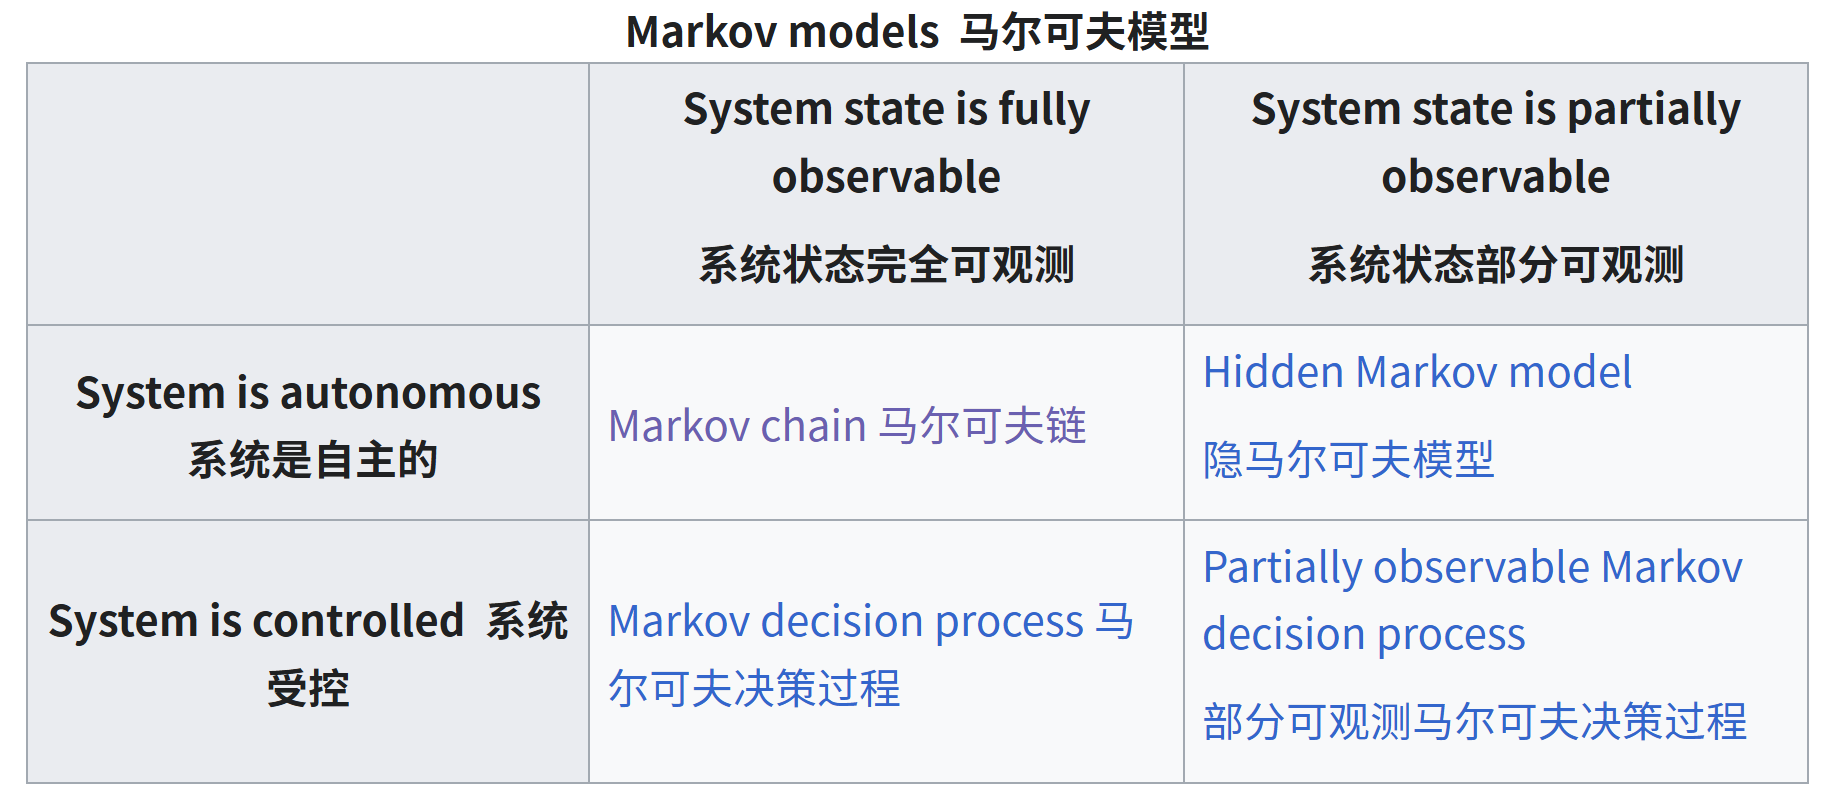

明确了分类之后，我们就可以来定义隐马尔可夫模型了。李航书第十章定义 10.1将马儿可夫模型描述如下 [@LiHang_2022]：

> 隐马尔可夫模型是关于时序的概率模型，描述由一个隐藏的马尔可夫链随机生成的不可观测的状态随机序列，再由各个状态生成一个观测从而产生观测随机序列的过程。隐藏的马尔可夫链随机生成的状态的序列称为状态序列（state sequence）；每个状态生成一个观测，而由此产生的观测的随机序列称为观测序列（observation sequence）。序列的每一个位置又可以看作是一个时刻。

其中，马尔可夫 链就是上文 @sec:markov_process 我们说的马尔可夫过程。这个马尔可夫过程的状态空间我们是知道的，也能做出一些假设，但是在具体系统中我们无法直接观测，所以说是隐藏的。而观测序列产生了一个新的随机过程，这个过程我们是可以观测到的，所以叫做观测序列。

李航上面给出的定义只是文字定义，还没有进行形式化，李航第十章进一步的形式化定义如下 [@LiHang_2022]：

> 设$Q$ 是所有可能的状态的集合，$V$ 是所有可能的观测的集合：  
> $Q=\{q_1,q_2,\cdots,q_N\},\quad V=\{v_1,v_2,\cdots,v_M\}$  
> 其中，$N$ 是可能的状态数，$M$ 是可能的观测数。
> $I$ 是长度为 $T$ 的状态序列，$O$ 是对应的观测序列：  
> $I=(i_1,i_2,\cdots,i_T),\quad O=(o_1,o_2,\cdots,o_T)$  

这里回应了我们上文说的，取值空间对于所有随机变量是一样的，所以叫做I和O都是随机过程。

> $A$ 是状态转移概率矩阵：  
> $A=[a_{ij}]_{N\times N}$ （10.1）
> 其中，  
> $a_{ij}=P(i_{t+1}=q_j|i_t=q_i)，i=1,2,\cdots,N,j=1,2,\cdots,N$ （10.2）
> 是在时刻 $t$ 处于状态 $q_i$ 的条件下在时刻 $t+1$ 转移到状态 $q_j$ 的概率。

这就是上文我们说的时间齐次马尔可夫链 (Time-homogeneous Markov chains) [@Markov_chain_2024]，可以用状态转移矩阵 $A$ 来表示条件概率。

> **B 是观测概率矩阵：**
> 
> $$
> B = [b_j(k)]_{N \times M}
> $$
> 
> 其中，
> 
> $$
> b_j(k) = P(o_t = v_k | i_t = q_j), \quad k = 1, 2, \cdots, M, \quad j = 1, 2, \cdots, N
> $$
> 是在时刻 $ t $ 处于状态 $ q_j $ 的条件下生成观测 $ v_k $ 的概率。
> 

李航指出，任意时刻的观测只依赖于该时刻的马尔可夫链的状态，与其他观测及状态无关，这个叫做观测独立性假设 [@LiHang_2022]。这里具体的依赖关系就是B这个观测概率矩阵。

> **π 是初始状态概率向量：**
> 
> $$
> \pi = (\pi_i)
> $$
> 
> 其中，
> 
> $$
> \pi_i = P(i_1 = q_i), \quad i = 1, 2, \cdots, N
> $$
> 是时刻 $ t = 1 $ 处于状态 $ q_i $ 的概率。
> 
> 隐马尔可夫模型由初始状态概率向量$\pi$、状态转移概率矩阵 A 和观测概率矩阵 B决定。$\pi$和 A决定状态序列，B决定观测序列。因此，隐马尔可夫模型$\lambda$可以用三元符号表示，即 $\lambda = (\pi, A, B)$, $A, B, \pi$ 称为隐马尔可夫模型的三要素。

李航强调了HMM模型用于机器学习的标注(Tagging)问题，隐藏状态对应的是标记 [@LiHang_2022]。

In [ ]:
from graphviz import Digraph

def draw_hmm(states, observations, start_probability, transition_probability, emission_probability):
    dot = Digraph(comment='The Round Table')

    # Add states as nodes
    for state in states:
        dot.node(state, state)

    # Add start transitions
    for state in states:
        dot.edge('Start', state, label=f'{start_probability[state]:.2f}')

    # Add state transitions
    for from_state in states:
        for to_state in states:
            if transition_probability[from_state][to_state] > 0:
                dot.edge(from_state, to_state, label=f'{transition_probability[from_state][to_state]:.2f}')

    # Add emissions
    for state in states:
        for observation in observations:
            dot.edge(state, f'{observation}', label=f'{emission_probability[state][observation]:.2f}', style='dashed')

    return dot

# Define HMM parameters
states = ['Rainy', 'Sunny']
observations = ['walk', 'shop', 'clean']
start_probability = {'Rainy': 0.6, 'Sunny': 0.4}
transition_probability = {
   'Rainy' : {'Rainy': 0.7, 'Sunny': 0.3},
   'Sunny' : {'Rainy': 0.4, 'Sunny': 0.6},
}
emission_probability = {
   'Rainy' : {'walk': 0.1, 'shop': 0.4, 'clean': 0.5},
   'Sunny' : {'walk': 0.6, 'shop': 0.3, 'clean': 0.1},
}

# Draw the HMM and save it to a file
hmm_graph = draw_hmm(states, observations, start_probability, transition_probability, emission_probability)
hmm_graph.render('hmm_model', format='png', view=True)  # This will create hmm_model.png and open it in your default image viewer

#### 给出隐马尔可夫模型的 3 个典型问题的形式化描述。（4 分）

## 任务二：基于HMM的强制对齐实验


## 参考文献 References {#sec-ref-list}

::: {#refs}
:::

In [ ]:
# | hide
import nbdev

nbdev.nbdev_export()